# Title : churning ANN model


In [101]:
# import all important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

Load data set

In [102]:
df = pd.read_csv("Churn Modelling.csv")

In [103]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Data preprocessing

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [105]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [106]:
df.duplicated().sum()

np.int64(0)

In [107]:
pd.options.display.float_format = '{:.2f}'.format

In [108]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.00,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.00,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48


In [109]:
df = df.drop(['RowNumber', 'CustomerId'], axis=1)
display(df.head())

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [110]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [111]:
df["Gender"].value_counts()

,count
Gender,
Male,5457
Female,4543


In [112]:
df["Geography"].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


# Data Visualisation


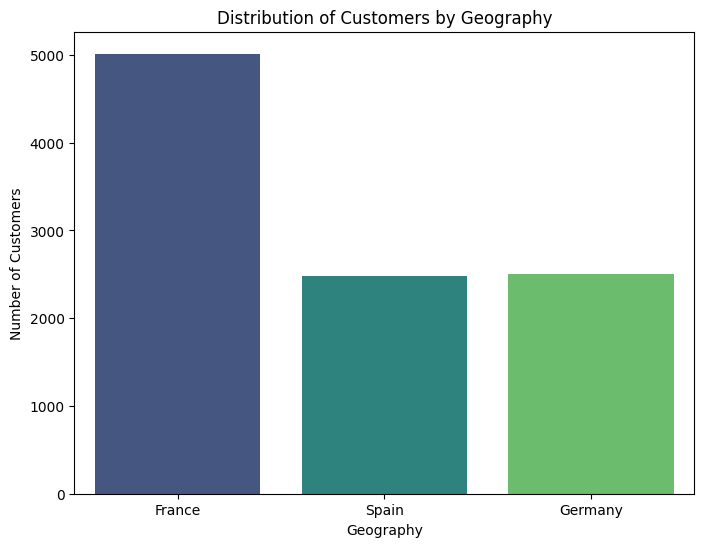

In [113]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', data=df, palette='viridis')
plt.title('Distribution of Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.show()

In [114]:
df["Exited"].value_counts()

,count
Exited,
0,7963
1,2037


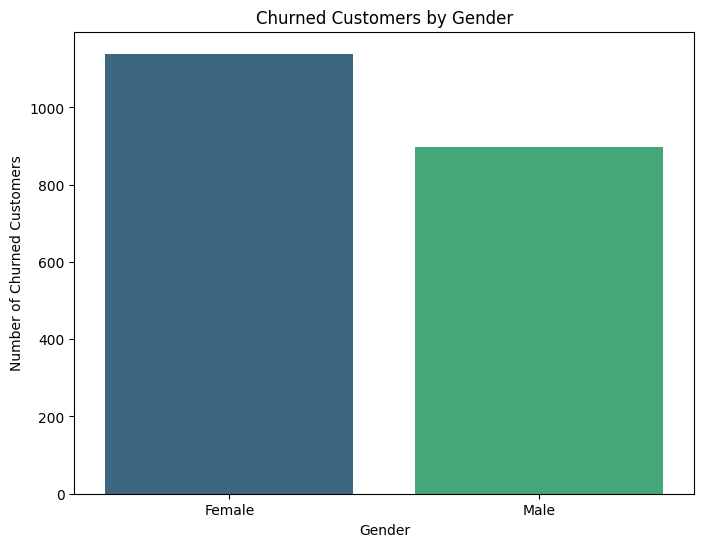

In [115]:
churned_customers = df[df['Exited'] == 1]

plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=churned_customers, palette='viridis')
plt.title('Churned Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Churned Customers')
plt.show()

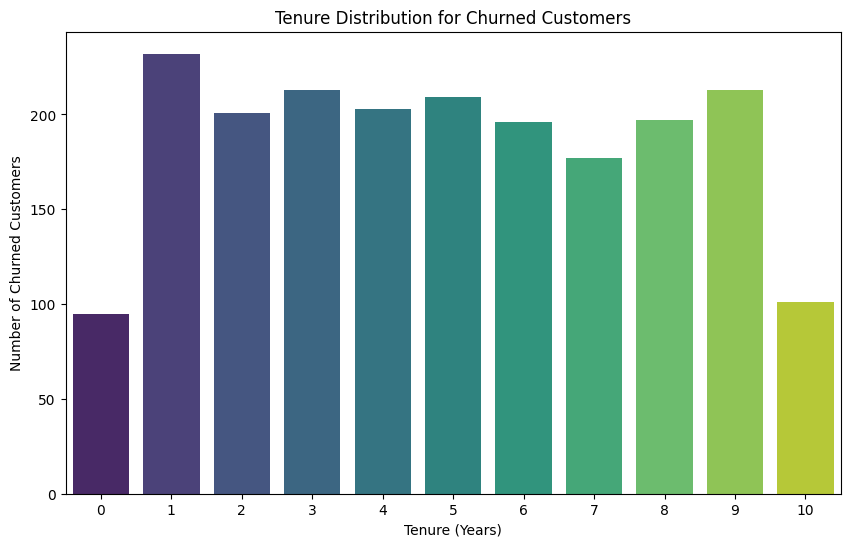

In [116]:
churned_customers = df[df['Exited'] == 1]

plt.figure(figsize=(10, 6))
sns.countplot(x='Tenure', data=churned_customers, palette='viridis')
plt.title('Tenure Distribution for Churned Customers')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Churned Customers')
plt.show()

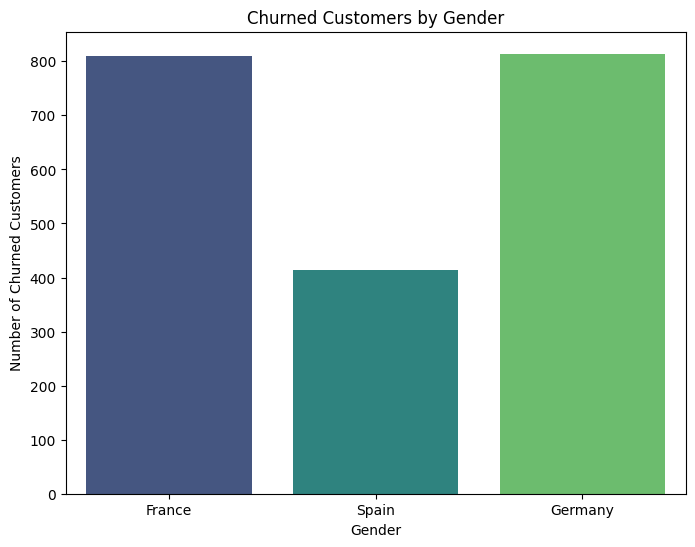

In [117]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', data=churned_customers, palette='viridis')
plt.title('Churned Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Churned Customers')
plt.show()

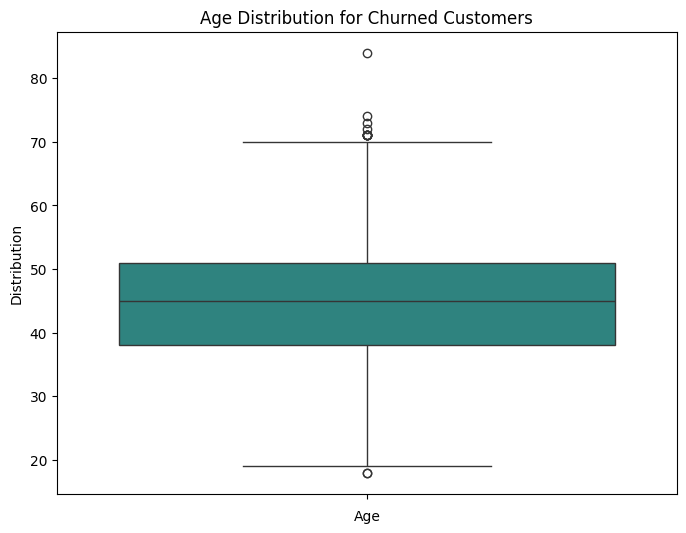

In [118]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Age', data=churned_customers, palette='viridis')
plt.title('Age Distribution for Churned Customers')
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.show()

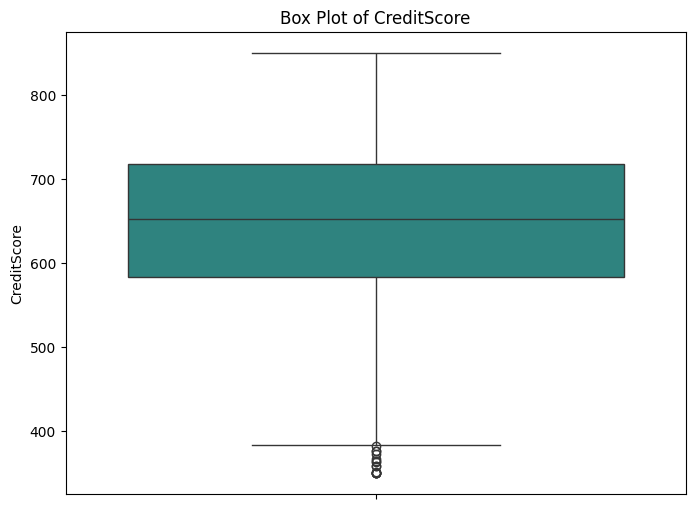

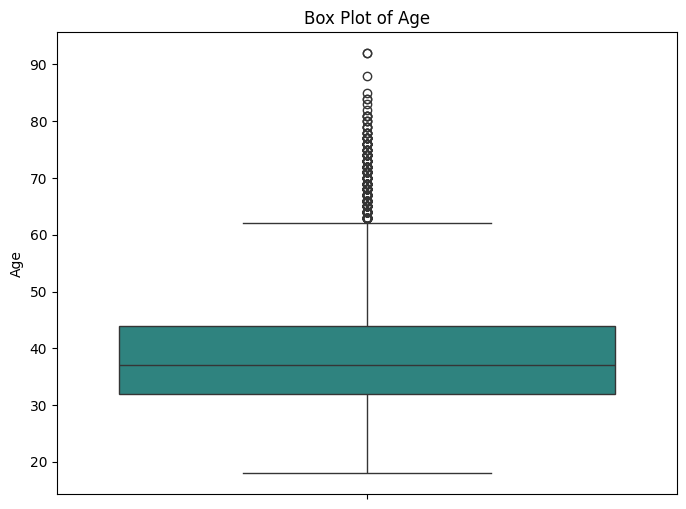

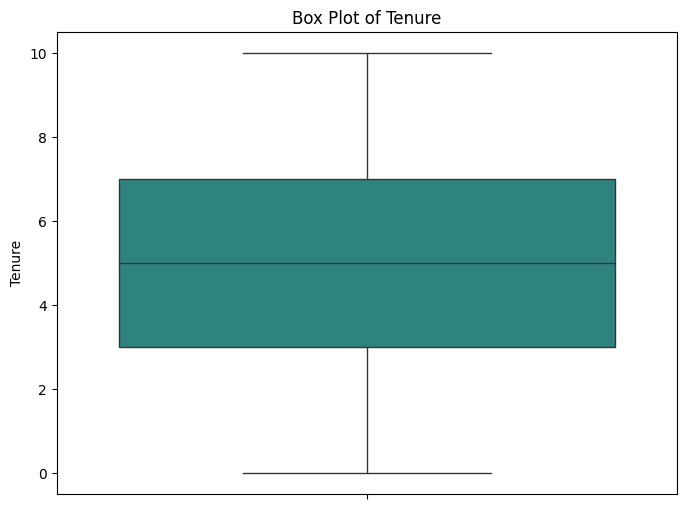

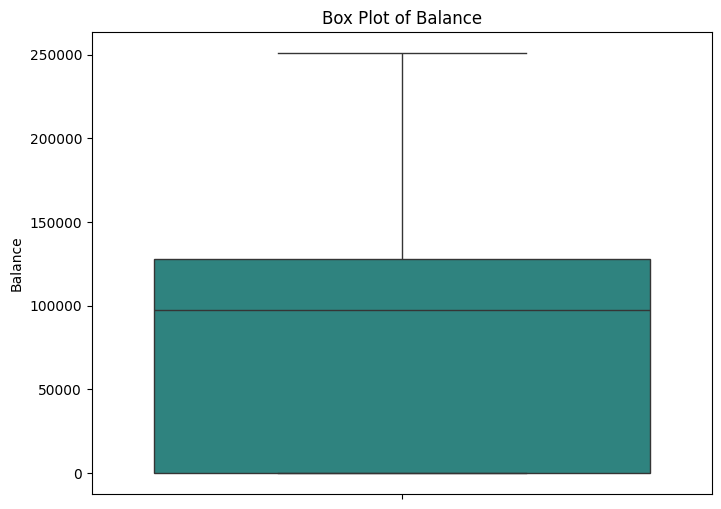

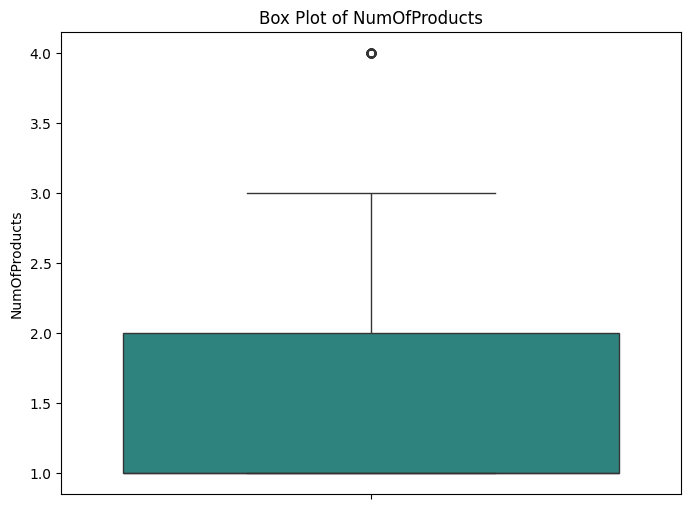

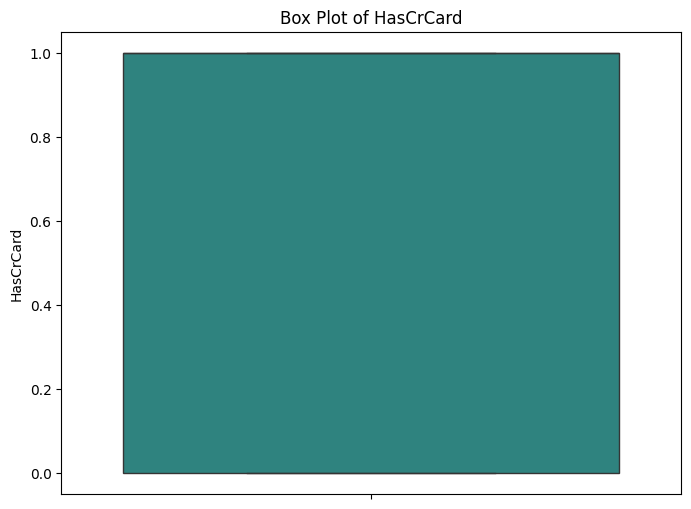

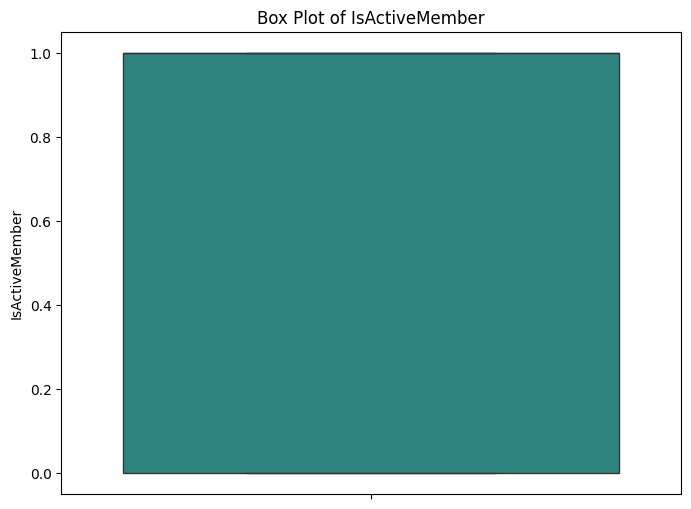

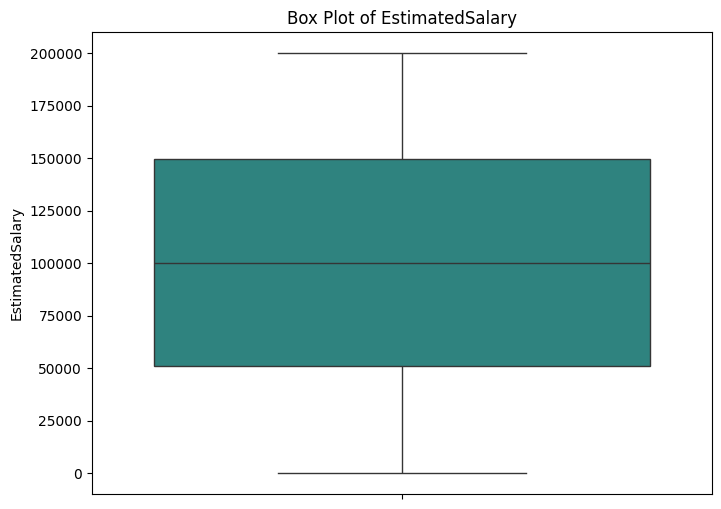

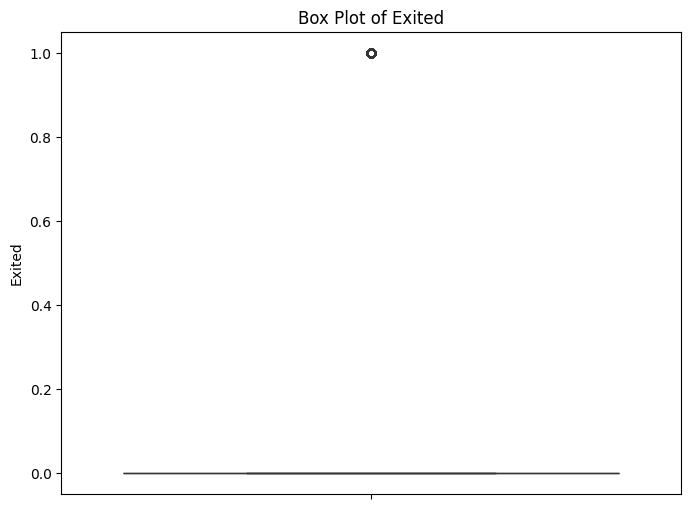

In [119]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col], palette='viridis')
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

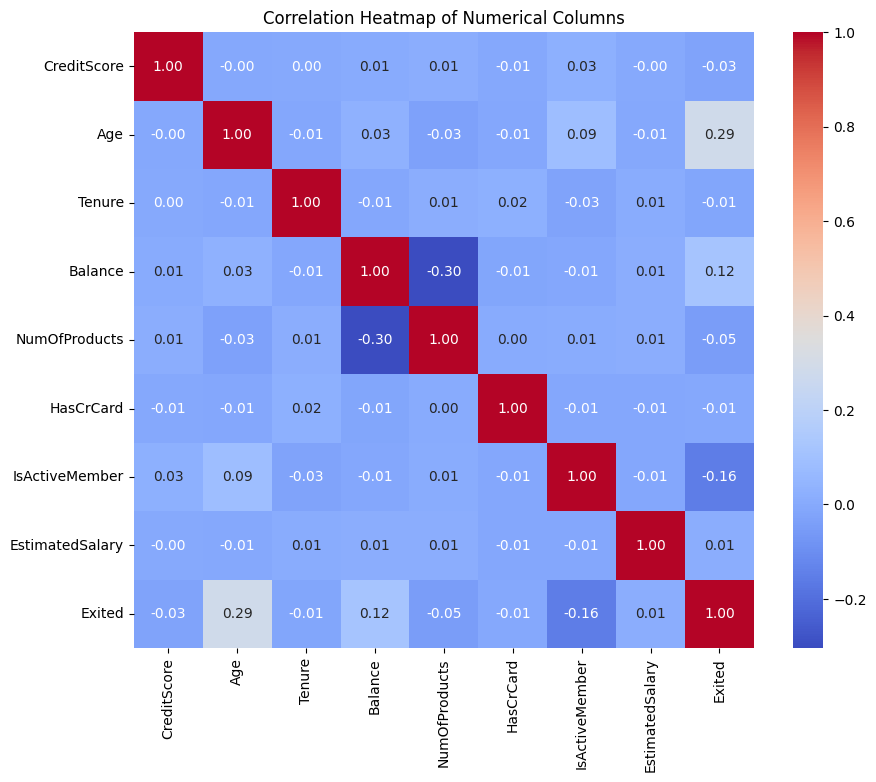

In [120]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

fixing all outliers

In [121]:
# Identify columns with outliers (based on visual inspection of box plots)
# Replace with the actual column names you observed outliers in from the previous box plots
columns_with_outliers = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Function to cap outliers using IQR
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply capping to the columns with outliers using a for loop
for col in columns_with_outliers:
    df = cap_outliers_iqr(df, col)

print("Outliers capped in the following columns:", columns_with_outliers)

Outliers capped in the following columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


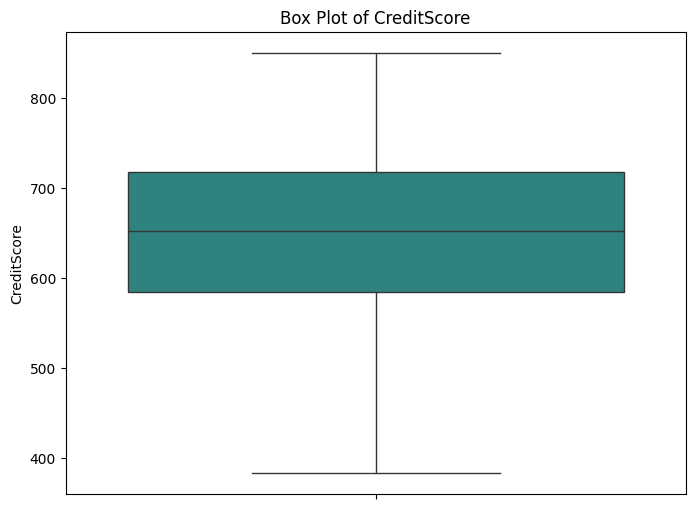

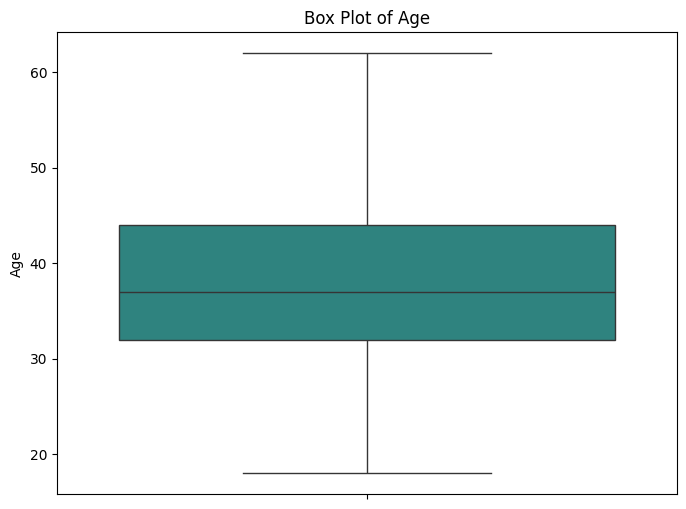

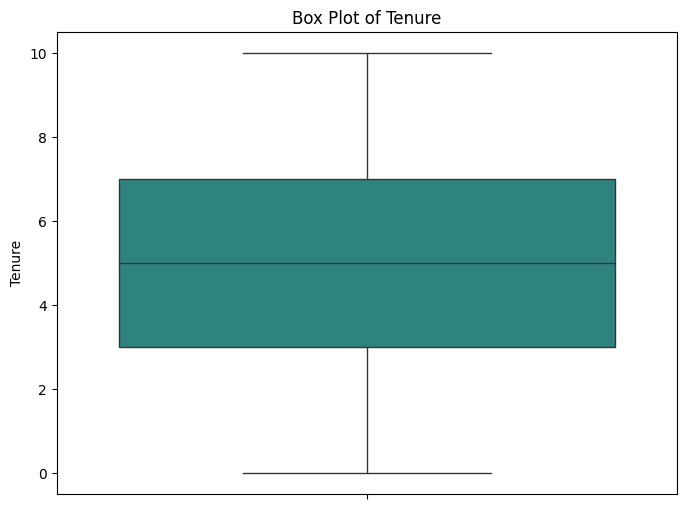

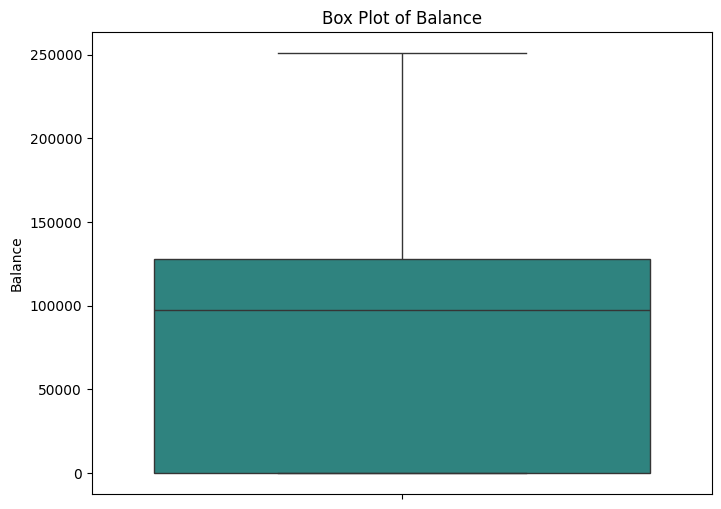

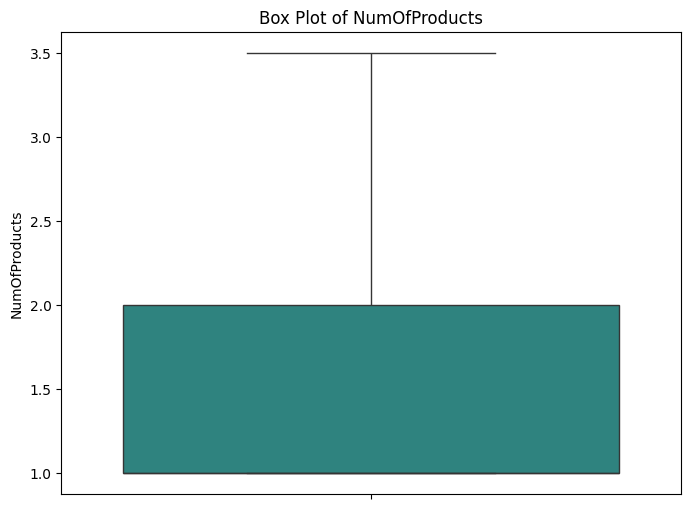

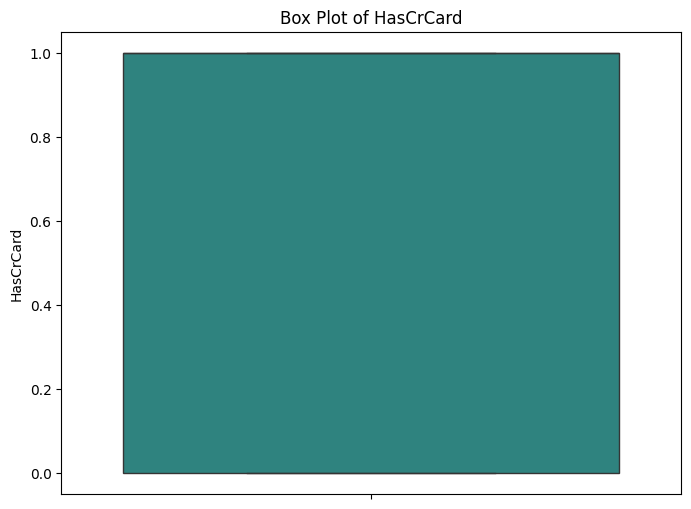

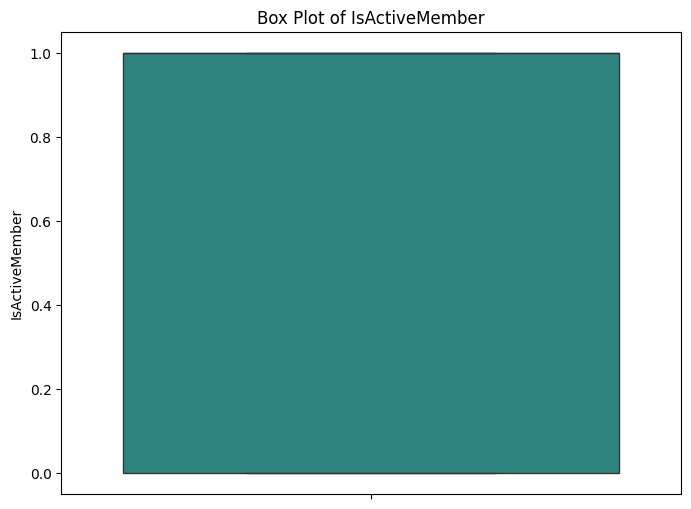

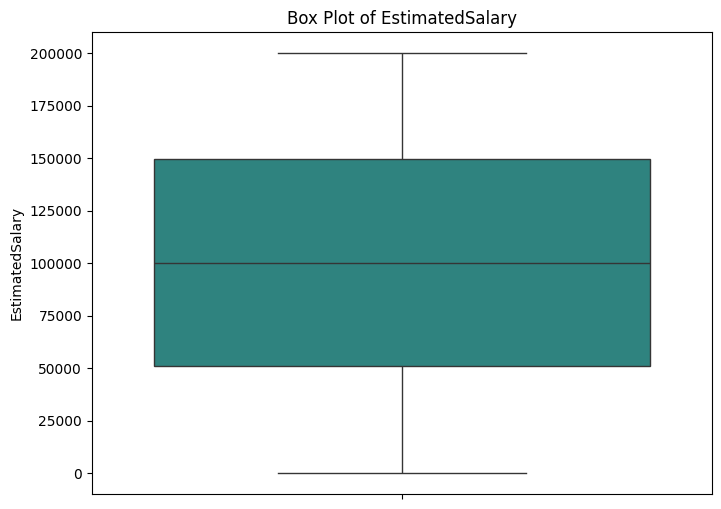

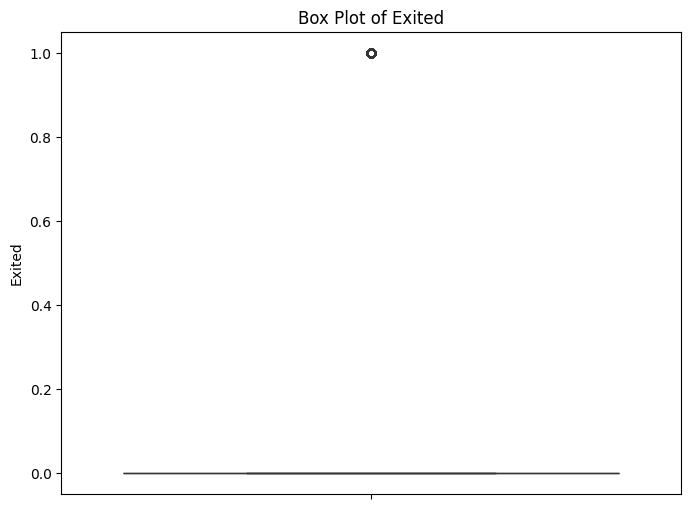

In [122]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col], palette='viridis')
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

Encoding : to convert all object data into numerical

In [123]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label.fit_transform(df[col])

display(df.head())

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1115,619.00,0,0,42.00,2.00,0.00,1.00,1,1,101348.88,1
1,1177,608.00,2,0,41.00,1.00,83807.86,1.00,0,1,112542.58,0
2,2040,502.00,0,0,42.00,8.00,159660.80,3.00,1,0,113931.57,1
3,289,699.00,0,0,39.00,1.00,0.00,2.00,0,0,93826.63,0
4,1822,850.00,2,0,43.00,2.00,125510.82,1.00,1,1,79084.10,0


In [124]:
df = df.drop('Surname', axis=1)
display(df.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.00,0,0,42.00,2.00,0.00,1.00,1,1,101348.88,1
1,608.00,2,0,41.00,1.00,83807.86,1.00,0,1,112542.58,0
2,502.00,0,0,42.00,8.00,159660.80,3.00,1,0,113931.57,1
3,699.00,0,0,39.00,1.00,0.00,2.00,0,0,93826.63,0
4,850.00,2,0,43.00,2.00,125510.82,1.00,1,1,79084.10,0


In [125]:
X = df.drop(["Exited"],axis = 1)
y = df["Exited"]

In [126]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.00,0,0,42.00,2.00,0.00,1.00,1,1,101348.88
1,608.00,2,0,41.00,1.00,83807.86,1.00,0,1,112542.58
2,502.00,0,0,42.00,8.00,159660.80,3.00,1,0,113931.57
3,699.00,0,0,39.00,1.00,0.00,2.00,0,0,93826.63
4,850.00,2,0,43.00,2.00,125510.82,1.00,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771.00,0,1,39.00,5.00,0.00,2.00,1,0,96270.64
9996,516.00,0,1,35.00,10.00,57369.61,1.00,1,1,101699.77
9997,709.00,0,0,36.00,7.00,0.00,1.00,0,1,42085.58
9998,772.00,1,1,42.00,3.00,75075.31,2.00,1,0,92888.52


In [127]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


scaling of data : to get data on same scale

In [128]:
from sklearn.preprocessing import MinMaxScaler

# Identify columns to scale (all columns in X except 'Geography' and 'Gender')
columns_to_scale = X.columns.difference(['Geography', 'Gender'])

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to the selected columns
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

display(X.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.51,0,0,0.55,0.20,0.00,0.00,1.00,1.00,0.51
1,0.48,2,0,0.52,0.10,0.33,0.00,0.00,1.00,0.56
2,0.25,0,0,0.55,0.80,0.64,0.80,1.00,0.00,0.57
3,0.68,0,0,0.48,0.10,0.00,0.40,0.00,0.00,0.47
4,1.00,2,0,0.57,0.20,0.50,0.00,1.00,1.00,0.40


Spliting of data into train and test

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [130]:
print(X_train.shape)
print(X_test.shape)
print("\n")
print(y_train.shape)
print(y_test.shape)

(8000, 10)
(2000, 10)


(8000,)
(2000,)


# ANN

In [138]:
# Define the ANN model

model = Sequential([
    Dense(24, activation='relu', input_dim= 10),  # Input layer + first hidden layer
    Dense(12, activation='relu'),  # Second hidden layer
    #Dense(units = 24, activation='relu'),  # Third hidden layer
    Dense(units = 1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the new model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Now you can train and save this model
# churn_model.fit(...)
# churn_model.save(...)

In [139]:
history = model.fit(X_train,y_train,epochs = 100,validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6545 - loss: 0.5975 - val_accuracy: 0.7987 - val_loss: 0.4642
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7917 - loss: 0.4736 - val_accuracy: 0.8112 - val_loss: 0.4389
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8005 - loss: 0.4528 - val_accuracy: 0.8294 - val_loss: 0.4221
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8167 - loss: 0.4328 - val_accuracy: 0.8344 - val_loss: 0.4154
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8142 - loss: 0.4294 - val_accuracy: 0.8300 - val_loss: 0.4151
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8210 - loss: 0.4264 - val_accuracy: 0.8350 - val_loss: 0.4061
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8251 - loss: 0.4213 - val_accuracy: 0.8375 - val_loss: 0.4018
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8260 - loss: 0.4101 - val_accu

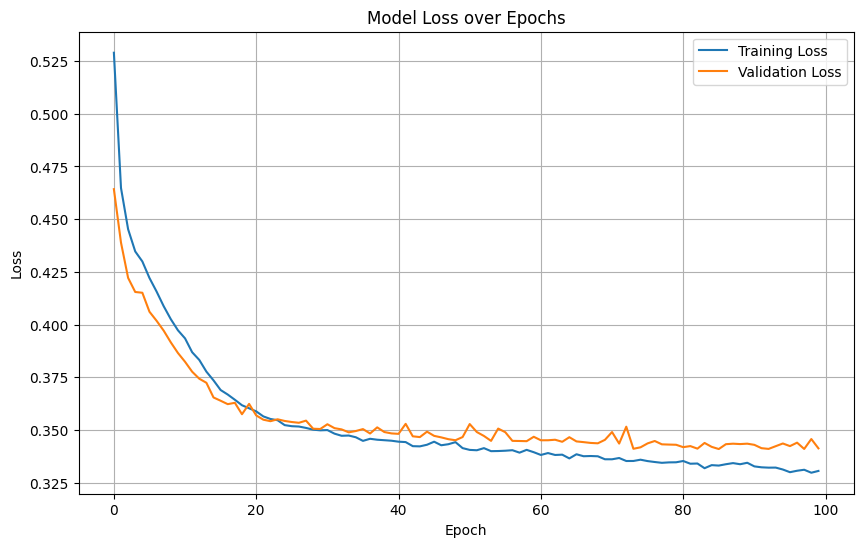

In [140]:
# relation between training loss and validation loss
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

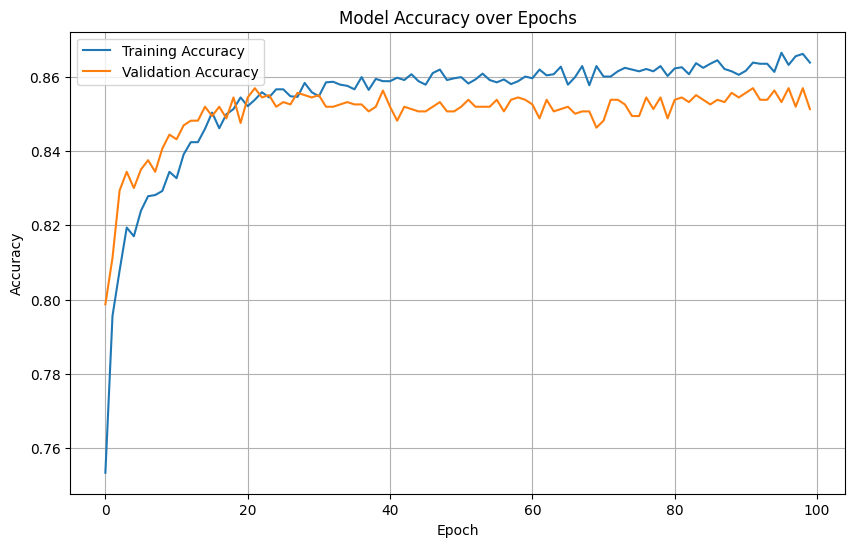

In [141]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [142]:
from sklearn.metrics import f1_score

# Predict probabilities on the test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate the F1-score
f1 = f1_score(y_test, y_pred)

print(f"F1-score: {f1:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
F1-score: 0.5639


In [143]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 24)             │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,733 (6.77 KB)

 Trainable params: 577 (2.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,156 (4.52 KB)

In [144]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1539   68]
 [ 212  181]]


0.86